In [ ]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sunabugday","key":"e10d109e827881ad66003380a1cd99bc"}'}

In [ ]:
!pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d anandshaw2001/imdb-data


Dataset URL: https://www.kaggle.com/datasets/anandshaw2001/imdb-data
License(s): CC0-1.0
100% 153M/153M [00:02<00:00, 86.0MB/s]
100% 153M/153M [00:02<00:00, 74.4MB/s]


In [ ]:
!unzip imdb-data.zip

Archive:  imdb-data.zip
  inflating: Imdb Movie Dataset.csv  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("/content/Imdb Movie Dataset.csv")

print(df.head())

       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released    7/15/2010   
1  157336     Interstellar         8.417       32571  Released    11/5/2014   
2     155  The Dark Knight         8.512       30619  Released    7/16/2008   
3   19995           Avatar         7.573       29815  Released   12/15/2009   
4   24428     The Avengers         7.710       29166  Released    4/25/2012   

      revenue  runtime  adult     budget  ... original_language  \
0   825532764      148  False  160000000  ...                en   
1   701729206      169  False  165000000  ...                en   
2  1004558444      152  False  185000000  ...                en   
3  2923706026      162  False  237000000  ...                en   
4  1518815515      143  False  220000000  ...                en   

    original_title                                           overview  \
0        Inception  Cobb, a skilled thief who com

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   title                 1048562 non-null  object 
 2   vote_average          1048575 non-null  float64
 3   vote_count            1048575 non-null  int64  
 4   status                1048575 non-null  object 
 5   release_date          866758 non-null   object 
 6   revenue               1048575 non-null  int64  
 7   runtime               1048575 non-null  int64  
 8   adult                 1048575 non-null  bool   
 9   budget                1048575 non-null  int64  
 10  imdb_id               560572 non-null   object 
 11  original_language     1048575 non-null  object 
 12  original_title        1048562 non-null  object 
 13  overview              832751 non-null   object 
 14  popularity            1048575 non-

In [ ]:
df.isnull().sum()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,181817
revenue,0
runtime,0
adult,0
budget,0


In [ ]:
zero_counts = (df == 0).sum()
zero_percentage = (df == 0).sum() / len(df) * 100

zero_df = pd.DataFrame({'Zero Count': zero_counts, 'Zero Percentage': zero_percentage})
zero_df = zero_df[zero_df['Zero Count'] > 0].sort_values(by="Zero Percentage", ascending=False)
print(zero_df)


              Zero Count  Zero Percentage
revenue          1027899        98.028181
budget            991807        94.586176
adult             951555        90.747443
vote_average      697950        66.561762
vote_count        697613        66.529624
runtime           293833        28.022125
popularity        137908        13.151944


In [ ]:
print("Revenue sütununda 0 olan veri sayısı:", (df["revenue"] == 0).sum())
print("Budget sütununda 0 olan veri sayısı:", (df["budget"] == 0).sum())
print("Runtime sütununda 0 olan veri sayısı:", (df["runtime"] == 0).sum())


Revenue sütununda 0 olan veri sayısı: 1027899
Budget sütununda 0 olan veri sayısı: 991807
Runtime sütununda 0 olan veri sayısı: 293833


In [ ]:
import numpy as np
df["revenue"] = df["revenue"].replace(0, np.nan)
df["budget"] = df["budget"].replace(0, np.nan)
df["runtime"] = df["runtime"].replace(0, np.nan)
df["vote_average"] = df["vote_average"].replace(0, np.nan)
df["vote_count"] = df["vote_count"].replace(0, np.nan)
df["popularity"] = df["popularity"].replace(0, np.nan)


In [ ]:
df.isnull().sum()

,0
id,0
title,13
vote_average,697950
vote_count,697613
status,0
release_date,181817
revenue,1027899
runtime,293833
adult,0
budget,991807


In [ ]:
missing_both = df[(df["budget"].isna()) & (df["revenue"].isna())]
print(f"Budget ve Revenue değeri eksik olan satır sayısı: {missing_both.shape[0]}")

Budget ve Revenue değeri eksik olan satır sayısı: 985297


In [ ]:
df = df[~((df["budget"].isna()) & (df["revenue"].isna()))]
print(f"Kalan satır sayısı: {df.shape[0]}")

Kalan satır sayısı: 63278


In [ ]:
df.isnull().sum()

,0
id,0
title,0
vote_average,30049
vote_count,29987
status,0
release_date,12400
revenue,42602
runtime,9258
adult,0
budget,6510


In [ ]:
df.drop(columns=["id", "title", "imdb_id", "overview", "tagline", "status",
                 "production_companies", "production_countries", "spoken_languages", "keywords"], inplace=True)


In [ ]:
df.drop(columns=["adult", "release_date"], inplace=True)

In [ ]:
df.drop(columns=["original_title"], inplace=True)

In [ ]:
print(df.isnull().sum())
df.shape

vote_average         30049
vote_count           29987
revenue              42602
runtime               9258
budget                6510
original_language        0
popularity            7693
genres               10755
dtype: int64


(63278, 8)

In [ ]:
df["vote_average"].fillna(df["vote_average"].median(), inplace=True)
df["vote_count"].fillna(df["vote_count"].median(), inplace=True)
df["popularity"].fillna(df["popularity"].median(), inplace=True)

<ipython-input-20-0e9d28bb574e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["vote_average"].fillna(df["vote_average"].median(), inplace=True)
<ipython-input-20-0e9d28bb574e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
print(df.isnull().sum())
df.shape

vote_average             0
vote_count               0
revenue              42602
runtime               9258
budget                6510
original_language        0
popularity               0
genres               10755
dtype: int64


(63278, 8)

In [ ]:
print(f"Budget eksik olan satır sayısı: {df['budget'].isna().sum()}")
print(f"Budget eksik olan ve revenue bilgisi OLMAYAN satır sayısı: {df[(df['budget'].isna()) & (df['revenue'].isna())].shape[0]}")

Budget eksik olan satır sayısı: 6510
Budget eksik olan ve revenue bilgisi OLMAYAN satır sayısı: 0


In [ ]:
missing_genres = df[(df["genres"].isna()) & (df["budget"].notna()) & (df["revenue"].notna())]
print(f"Genres eksik ama Budget ve Revenue olan satır sayısı: {missing_genres.shape[0]}")

Genres eksik ama Budget ve Revenue olan satır sayısı: 1659


In [ ]:
df = df[~((df["genres"].isna()) & ((df["budget"].isna()) | (df["revenue"].isna())))]
#Eğer genres eksikse ama budget ve revenue varsa, o satırlar kalıyor.
#Eğer genres eksikse ve aynı zamanda budget veya revenue de eksikse, o satırlar siliniyor.

In [ ]:
print(df.isnull().sum())

vote_average             0
vote_count               0
revenue              33797
runtime               6413
budget                6219
original_language        0
popularity               0
genres                1659
dtype: int64


In [ ]:
from collections import Counter

genre_counts = Counter([genre.strip() for sublist in df["genres"].dropna().str.split(",") for genre in sublist])

top_12_genres = [genre for genre, count in genre_counts.most_common(12)]

for genre in top_12_genres:
    df[f"genre_{genre}"] = df["genres"].apply(lambda x: 1 if isinstance(x, str) and genre in x else 0)

df["genre_Other"] = df["genres"].apply(lambda x: 1 if isinstance(x, str) and not any(g in x for g in top_12_genres) else 0)


In [ ]:
print(df.head())

   vote_average  vote_count       revenue  runtime       budget  \
0         8.364     34495.0  8.255328e+08    148.0  160000000.0   
1         8.417     32571.0  7.017292e+08    169.0  165000000.0   
2         8.512     30619.0  1.004558e+09    152.0  185000000.0   
3         7.573     29815.0  2.923706e+09    162.0  237000000.0   
4         7.710     29166.0  1.518816e+09    143.0  220000000.0   

  original_language  popularity                                       genres  \
0                en      83.952           Action, Science Fiction, Adventure   
1                en     140.241            Adventure, Drama, Science Fiction   
2                en     130.643               Drama, Action, Crime, Thriller   
3                en      79.932  Action, Adventure, Fantasy, Science Fiction   
4                en      98.082           Science Fiction, Action, Adventure   

   genre_Drama  genre_Comedy  ...  genre_Horror  genre_Action  genre_Romance  \
0            0             0  ...   

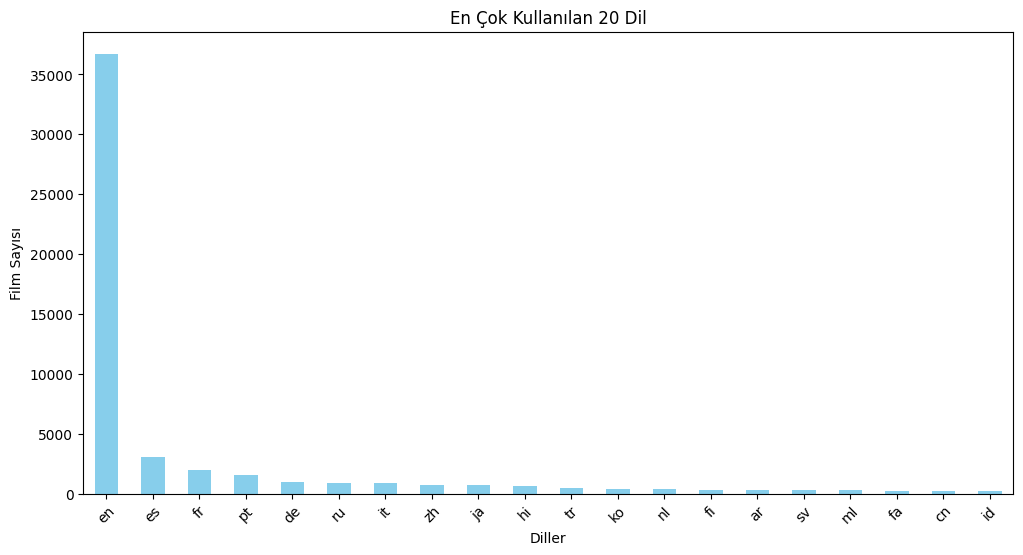

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df["original_language"].value_counts().head(20).plot(kind="bar", color="skyblue")
plt.title("En Çok Kullanılan 20 Dil")
plt.xlabel("Diller")
plt.ylabel("Film Sayısı")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = df.drop(columns=[col for col in df.columns if col.startswith("lang_")], errors="ignore")

df = df.drop(columns=["language_group"], errors="ignore")


In [ ]:
print(df.head())
print(df.columns)  # Hangi sütunlar kaldı?

   vote_average  vote_count       revenue  runtime       budget  \
0         8.364     34495.0  8.255328e+08    148.0  160000000.0   
1         8.417     32571.0  7.017292e+08    169.0  165000000.0   
2         8.512     30619.0  1.004558e+09    152.0  185000000.0   
3         7.573     29815.0  2.923706e+09    162.0  237000000.0   
4         7.710     29166.0  1.518816e+09    143.0  220000000.0   

  original_language  popularity                                       genres  \
0                en      83.952           Action, Science Fiction, Adventure   
1                en     140.241            Adventure, Drama, Science Fiction   
2                en     130.643               Drama, Action, Crime, Thriller   
3                en      79.932  Action, Adventure, Fantasy, Science Fiction   
4                en      98.082           Science Fiction, Action, Adventure   

   genre_Drama  genre_Comedy  ...  genre_Horror  genre_Action  genre_Romance  \
0            0             0  ...   

In [ ]:
western_languages = ["es", "fr", "pt", "de", "it"]

def categorize_language(lang):
    if lang == "en":
        return "English"  # İngilizce tek başına
    elif lang in western_languages:
        return "Western"  # Batı Avrupa dilleri
    else:
        return "Other"  # Diğer tüm diller

df["language_group"] = df["original_language"].apply(categorize_language)


In [ ]:
print(df["language_group"].value_counts())

language_group
English    36731
Other       9049
Western     8402
Name: count, dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=["language_group"], prefix="lang", dtype=int)

In [ ]:
print(df.head())
print(df[["lang_English", "lang_Western", "lang_Other"]].sum())

   vote_average  vote_count       revenue  runtime       budget  \
0         8.364     34495.0  8.255328e+08    148.0  160000000.0   
1         8.417     32571.0  7.017292e+08    169.0  165000000.0   
2         8.512     30619.0  1.004558e+09    152.0  185000000.0   
3         7.573     29815.0  2.923706e+09    162.0  237000000.0   
4         7.710     29166.0  1.518816e+09    143.0  220000000.0   

  original_language  popularity                                       genres  \
0                en      83.952           Action, Science Fiction, Adventure   
1                en     140.241            Adventure, Drama, Science Fiction   
2                en     130.643               Drama, Action, Crime, Thriller   
3                en      79.932  Action, Adventure, Fantasy, Science Fiction   
4                en      98.082           Science Fiction, Action, Adventure   

   genre_Drama  genre_Comedy  ...  genre_Documentary  genre_Crime  \
0            0             0  ...              

In [ ]:
print(df["original_language"].value_counts())    # önceden çalıştırdığım kod

original_language
en    36731
es     3081
fr     1965
pt     1548
de      968
      ...  
nn        1
ks        1
om        1
gv        1
lg        1
Name: count, Length: 117, dtype: int64


In [ ]:
print(df.isnull().sum())

vote_average                 0
vote_count                   0
revenue                  33797
runtime                   6413
budget                    6219
original_language            0
popularity                   0
genres                    1659
genre_Drama                  0
genre_Comedy                 0
genre_Thriller               0
genre_Horror                 0
genre_Action                 0
genre_Romance                0
genre_Documentary            0
genre_Crime                  0
genre_Adventure              0
genre_Science Fiction        0
genre_Mystery                0
genre_Fantasy                0
genre_Other                  0
lang_English                 0
lang_Other                   0
lang_Western                 0
dtype: int64


In [ ]:
genre_columns = [col for col in df.columns if col.startswith("genre_")]

for genre in genre_columns:
    median_runtime = df[df[genre] == 1]["runtime"].median()
    df.loc[(df["runtime"].isna()) & (df[genre] == 1), "runtime"] = median_runtime

df["runtime"].fillna(df["runtime"].median(), inplace=True)

<ipython-input-36-0a5ca2dffb46>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["runtime"].fillna(df["runtime"].median(), inplace=True)


In [ ]:
print(df["runtime"].isnull().sum())

0


In [ ]:
print(df["budget"].isnull().sum())

6219


In [ ]:
print(df[df["budget"].isnull()][["revenue", "popularity",
"vote_average", "vote_count", "runtime"]].isnull().sum())
# Eksik budget değerlerini tahmin etmek için yeterli veri var

revenue         0
popularity      0
vote_average    0
vote_count      0
runtime         0
dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

df_train = df[df["budget"].notna()]
df_missing = df[df["budget"].isna()]

features = ["revenue", "popularity", "vote_average", "vote_count",
            "runtime", "lang_English", "lang_Western", "lang_Other"]
X_train = df_train[features]
y_train = df_train["budget"]

budget_model = RandomForestRegressor(n_estimators=100, random_state=42)
budget_model.fit(X_train, y_train)

df_missing["budget"] = budget_model.predict(df_missing[features])

df.loc[df["budget"].isna(), "budget"] = df_missing["budget"]


<ipython-input-40-81e2eb9af0fe>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing["budget"] = budget_model.predict(df_missing[features])


In [ ]:
print(df["budget"].isnull().sum())

0


In [ ]:
print(df["genres"].isnull().sum())

1659


In [ ]:
print(df[df["genres"].isnull()][["budget", "revenue", "popularity", "vote_average", "vote_count", "runtime"]].isnull().sum())


budget          0
revenue         0
popularity      0
vote_average    0
vote_count      0
runtime         0
dtype: int64


In [ ]:
print(df.isnull().sum())

vote_average                 0
vote_count                   0
revenue                  33797
runtime                      0
budget                       0
original_language            0
popularity                   0
genres                    1659
genre_Drama                  0
genre_Comedy                 0
genre_Thriller               0
genre_Horror                 0
genre_Action                 0
genre_Romance                0
genre_Documentary            0
genre_Crime                  0
genre_Adventure              0
genre_Science Fiction        0
genre_Mystery                0
genre_Fantasy                0
genre_Other                  0
lang_English                 0
lang_Other                   0
lang_Western                 0
dtype: int64


In [ ]:
df_missing_genres = df[df["genres"].isna()]
print(df_missing_genres["revenue"].isna().sum(), "/", df_missing_genres.shape[0])
###   Hepsinde revenue değeri var

0 / 1659


In [ ]:
df["genre_Unknown"] = 0

df.loc[df["genres"].isna(), "genre_Unknown"] = 1

In [ ]:
print(df["genre_Unknown"].sum())
print(df["genres"].isna().sum())  # 1659 çıkmalı

1659
1659


In [ ]:
df.isnull().sum()

,0
vote_average,0
vote_count,0
revenue,33797
runtime,0
budget,0
original_language,0
popularity,0
genre_Drama,0
genre_Comedy,0
genre_Thriller,0


In [ ]:
df.drop(columns=["genres"], inplace=True)

In [ ]:
print(df[genre_columns].sum())  # Tüm türlerin toplamını kontrol et

genre_Drama              22485
genre_Comedy             14664
genre_Thriller            9169
genre_Horror              9123
genre_Action              6840
genre_Romance             5827
genre_Documentary         5404
genre_Crime               4485
genre_Adventure           4050
genre_Science Fiction     3939
genre_Mystery             3394
genre_Fantasy             3385
genre_Other               1293
dtype: int64


In [ ]:
if "genre_Unknown" not in genre_columns:
    genre_columns.append("genre_Unknown")

In [ ]:
print(df["genre_Unknown"].sum())

1659


In [ ]:
genre_columns = [col for col in df.columns if col.startswith("genre_")]


In [ ]:
df.isnull().sum()

,0
vote_average,0
vote_count,0
revenue,33797
runtime,0
budget,0
original_language,0
popularity,0
genre_Drama,0
genre_Comedy,0
genre_Thriller,0


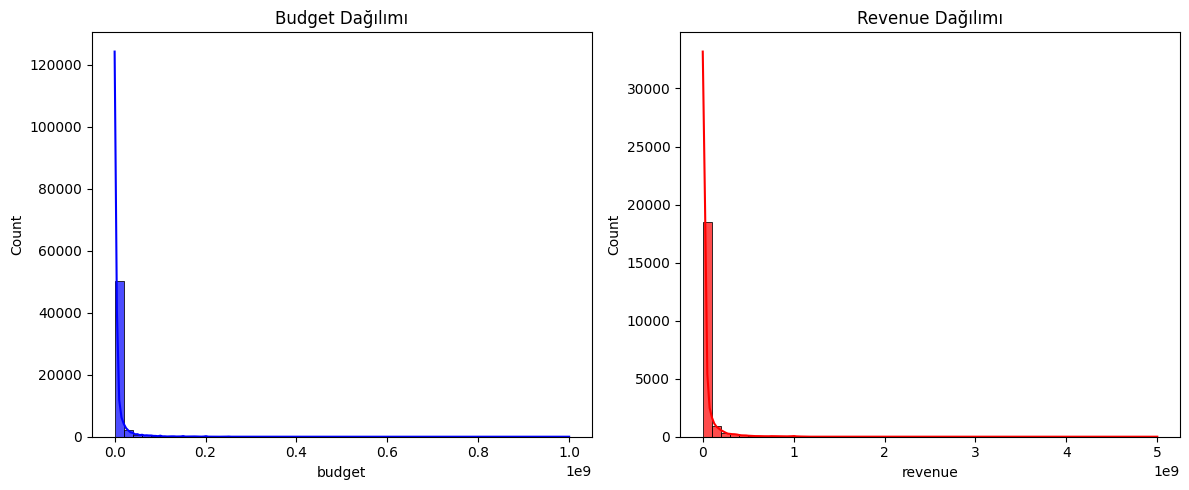

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["budget"], bins=50, kde=True, color="blue", alpha=0.7)
plt.title("Budget Dağılımı")

plt.subplot(1, 2, 2)
sns.histplot(df["revenue"].dropna(), bins=50, kde=True, color="red", alpha=0.7)
plt.title("Revenue Dağılımı")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

df["log_budget"] = np.log1p(df["budget"])
df["log_revenue"] = np.log1p(df["revenue"])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


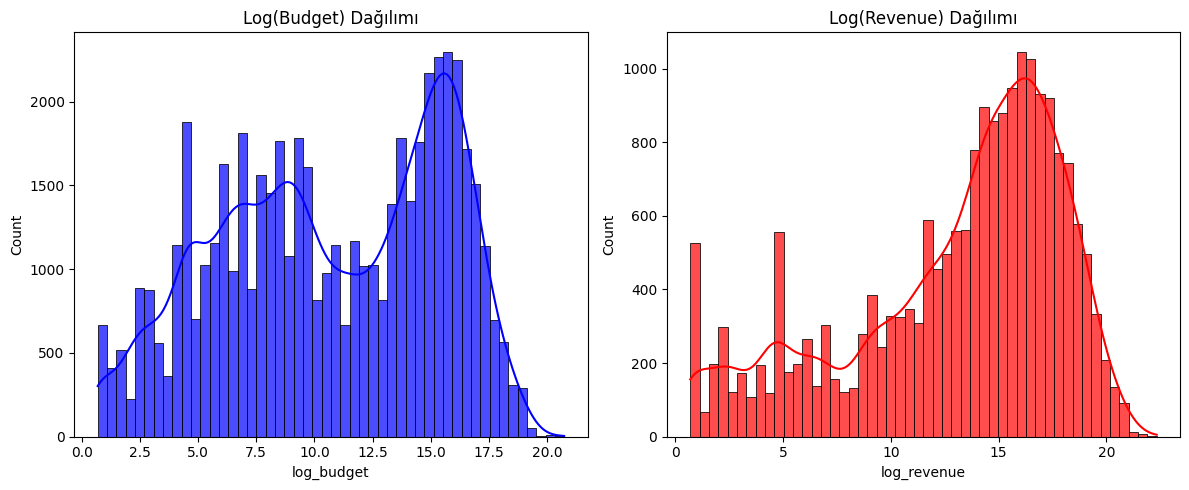

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["log_budget"], bins=50, kde=True, color="blue", alpha=0.7)
plt.title("Log(Budget) Dağılımı")

plt.subplot(1, 2, 2)
sns.histplot(df["log_revenue"].dropna(), bins=50, kde=True, color="red", alpha=0.7)
plt.title("Log(Revenue) Dağılımı")

plt.tight_layout()
plt.show()


In [ ]:
df_numeric = df.select_dtypes(include=["number"])
print(df_numeric.dtypes)  # Sayısal değişken kontrol


vote_average             float64
vote_count               float64
revenue                  float64
runtime                  float64
budget                   float64
popularity               float64
genre_Drama                int64
genre_Comedy               int64
genre_Thriller             int64
genre_Horror               int64
genre_Action               int64
genre_Romance              int64
genre_Documentary          int64
genre_Crime                int64
genre_Adventure            int64
genre_Science Fiction      int64
genre_Mystery              int64
genre_Fantasy              int64
genre_Other                int64
lang_English               int64
lang_Other                 int64
lang_Western               int64
genre_Unknown              int64
log_budget               float64
log_revenue              float64
dtype: object


In [ ]:
df_train = df[df["revenue"].notna()]
df_missing = df[df["revenue"].isna()]

features = ["budget", "popularity", "vote_average", "vote_count", "runtime"]

X_train = df_train[features]
y_train = df_train["revenue"]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

revenue_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)

revenue_model.fit(X_train, y_train)
print("Model eğitimi tamamlandı.")

Model eğitimi tamamlandı.


In [ ]:
X_missing = df_missing[features]

df_missing["revenue"] = revenue_model.predict(X_missing)

df.loc[df["revenue"].isna(), "revenue"] = df_missing["revenue"]

print("Eksik revenue değerleri tahmin edildi ve dataframe'e eklendi.")


Eksik revenue değerleri tahmin edildi ve dataframe'e eklendi.


<ipython-input-65-f67e7b462e50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing["revenue"] = revenue_model.predict(X_missing)


In [ ]:
print(df["revenue"].isna().sum())

0


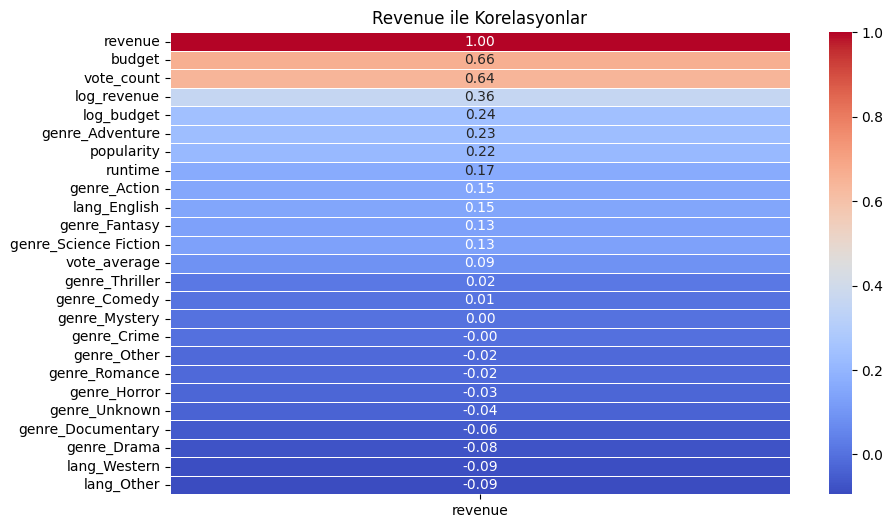

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix[["revenue"]].sort_values(by="revenue", ascending=False),
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Revenue ile Korelasyonlar")
plt.show()


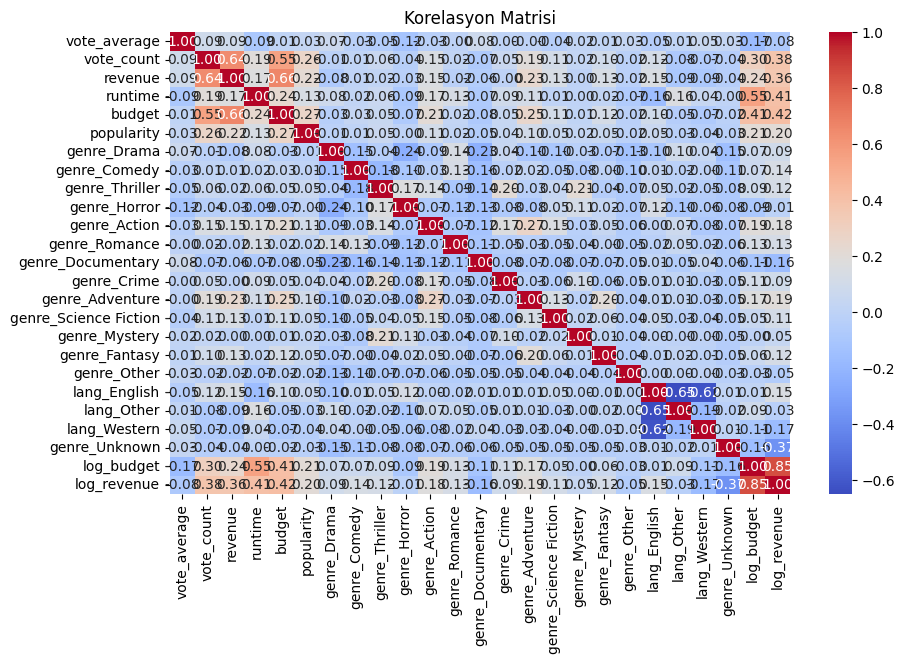

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


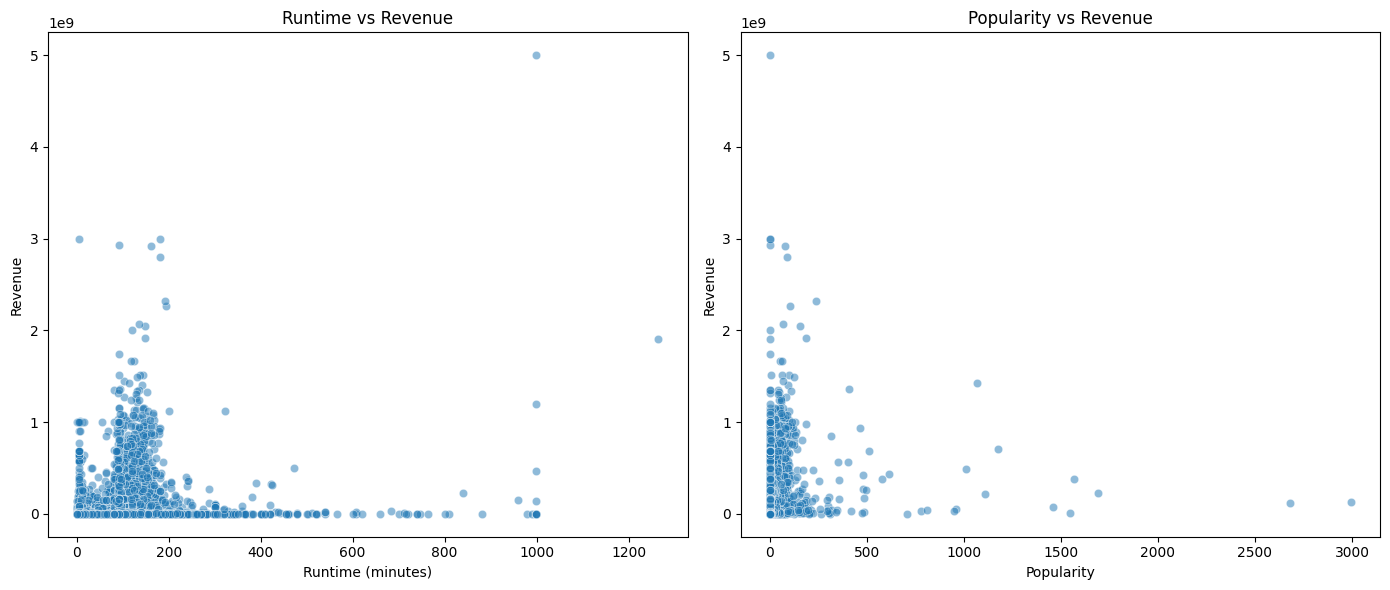

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=df["runtime"], y=df["revenue"], alpha=0.5, ax=axes[0])
axes[0].set_title("Runtime vs Revenue")
axes[0].set_xlabel("Runtime (minutes)")
axes[0].set_ylabel("Revenue")

sns.scatterplot(x=df["popularity"], y=df["revenue"], alpha=0.5, ax=axes[1])
axes[1].set_title("Popularity vs Revenue")
axes[1].set_xlabel("Popularity")
axes[1].set_ylabel("Revenue")

plt.tight_layout()
plt.show()


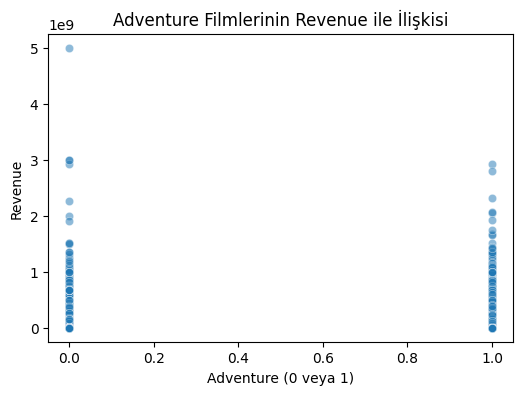

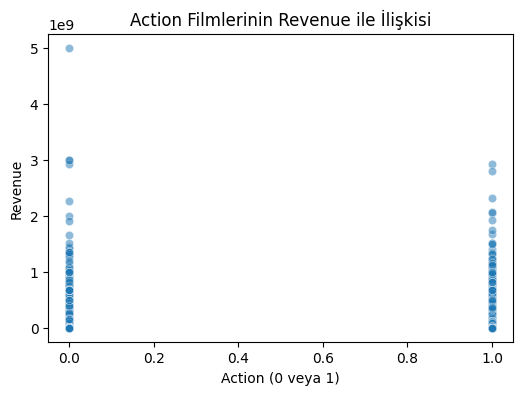

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(x, y, x_label, y_label, title):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=x, y=y, alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# Adventure ve Action türlerinin revenue ile dağılımı
plot_scatter(df["genre_Adventure"], df["revenue"], "Adventure (0 veya 1)", "Revenue", "Adventure Filmlerinin Revenue ile İlişkisi")
plot_scatter(df["genre_Action"], df["revenue"], "Action (0 veya 1)", "Revenue", "Action Filmlerinin Revenue ile İlişkisi")


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


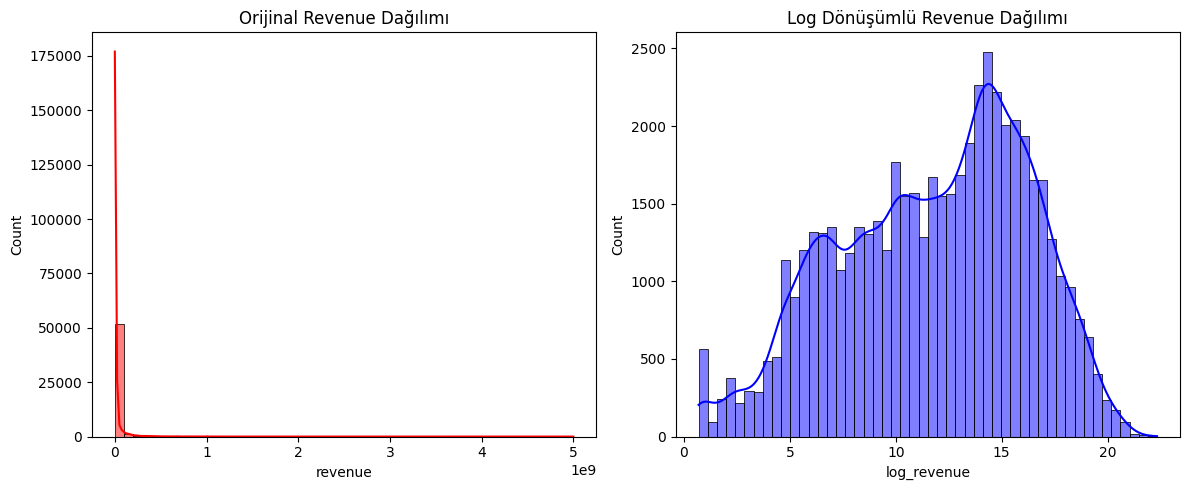

In [ ]:
import numpy as np

df["log_revenue"] = np.log1p(df["revenue"])

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["revenue"], bins=50, kde=True, ax=axes[0], color="red")
axes[0].set_title("Orijinal Revenue Dağılımı")

sns.histplot(df["log_revenue"], bins=50, kde=True, ax=axes[1], color="blue")
axes[1].set_title("Log Dönüşümlü Revenue Dağılımı")

plt.tight_layout()
plt.show()


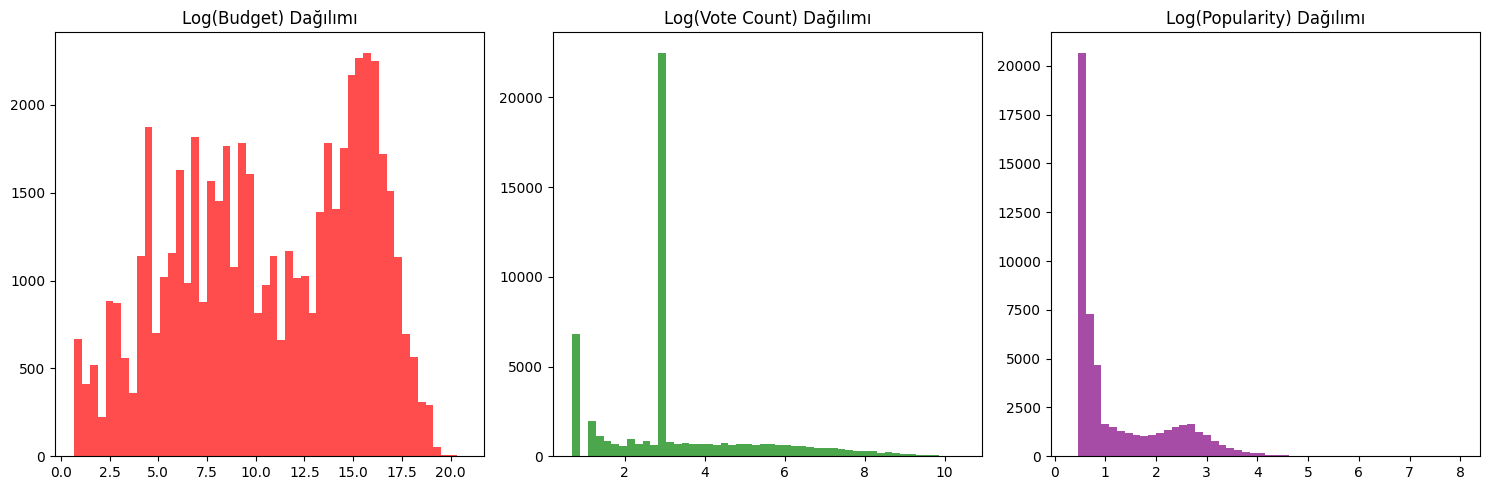

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df["log_budget"] = np.log1p(df["budget"])
df["log_vote_count"] = np.log1p(df["vote_count"])
df["log_popularity"] = np.log1p(df["popularity"])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df["log_budget"].dropna(), bins=50, color="red", alpha=0.7)
axes[0].set_title("Log(Budget) Dağılımı")

axes[1].hist(df["log_vote_count"].dropna(), bins=50, color="green", alpha=0.7)
axes[1].set_title("Log(Vote Count) Dağılımı")

axes[2].hist(df["log_popularity"].dropna(), bins=50, color="purple", alpha=0.7)
axes[2].set_title("Log(Popularity) Dağılımı")

plt.tight_layout()
plt.show()


In [ ]:
print(df["log_revenue"].isna().sum())  # NaN olan satır sayısıı için

1


In [ ]:
df = df.dropna(subset=["log_revenue"])
print(df["log_revenue"].isna().sum())

0


Mean Squared Error (MSE): 7.764776644301856
R² Skoru: 0.6088481484003627


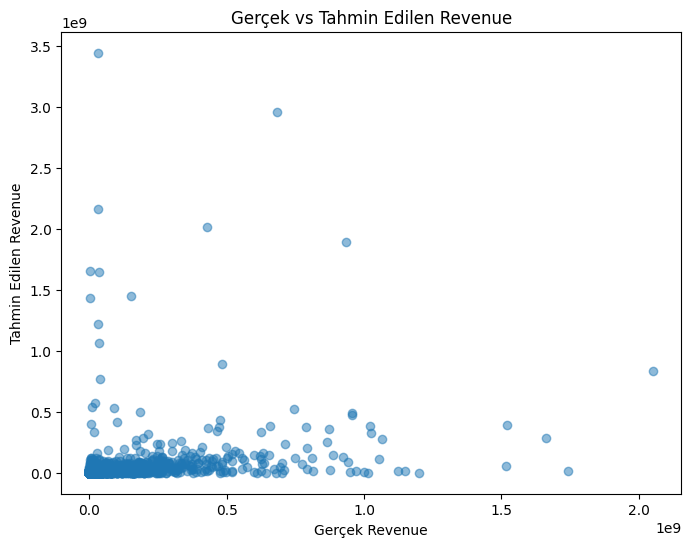

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

features = ["log_budget", "log_vote_count", "log_popularity", "genre_Action", "genre_Adventure"]

X = df[features]
y = df["log_revenue"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Skoru: {r2}")

y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.xlabel("Gerçek Revenue")
plt.ylabel("Tahmin Edilen Revenue")
plt.title("Gerçek vs Tahmin Edilen Revenue")
plt.show()


Mean Squared Error (MSE): 6.675536465875045
R² Skoru: 0.6637187946720784


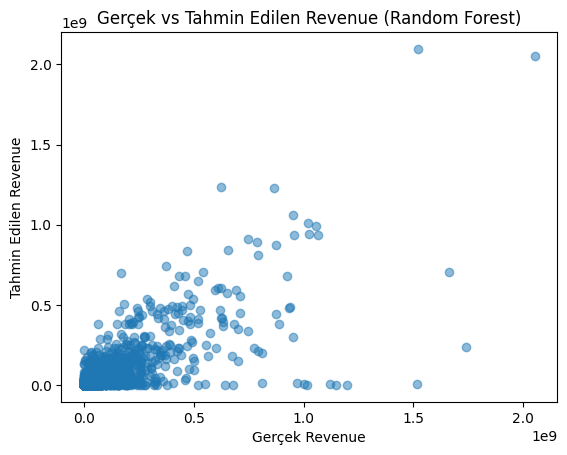

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

features = ["log_budget", "log_vote_count", "log_popularity", "genre_Adventure", "genre_Action"]

X = df[features]
y = df["log_revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Skoru: {r2}")

import matplotlib.pyplot as plt

plt.scatter(np.expm1(y_test), np.expm1(y_pred), alpha=0.5)
plt.xlabel("Gerçek Revenue")
plt.ylabel("Tahmin Edilen Revenue")
plt.title("Gerçek vs Tahmin Edilen Revenue (Random Forest)")
plt.show()


In [ ]:
import pandas as pd
comparison_df = pd.DataFrame({
    "Gerçek Revenue": y_test[:10],
    "Tahmin Edilen Revenue": y_pred[:10]
})

print(comparison_df)


        Gerçek Revenue  Tahmin Edilen Revenue
802438        1.581038               8.742100
439890        6.528981               8.318325
826678        7.712532               7.704541
957026        7.168811               8.040515
629388        9.835294              11.415415
367326       13.430455              13.040592
167214       12.746899              11.465310
78749        14.308172              13.005629
231035        6.512993               7.245393
602247       18.478950              18.234686


In [ ]:
import numpy as np

comparison_df["Gerçek Revenue "] = np.expm1(comparison_df["Gerçek Revenue"])
comparison_df["Tahmin Edilen Revenue "] = np.expm1(comparison_df["Tahmin Edilen Revenue"])

print(comparison_df[["Gerçek Revenue", "Tahmin Edilen Revenue"]])


        Gerçek Revenue  Tahmin Edilen Revenue
802438        1.581038               8.742100
439890        6.528981               8.318325
826678        7.712532               7.704541
957026        7.168811               8.040515
629388        9.835294              11.415415
367326       13.430455              13.040592
167214       12.746899              11.465310
78749        14.308172              13.005629
231035        6.512993               7.245393
602247       18.478950              18.234686
